### Generate: Elastic impedance, normalized elastic impedance, lambda-mu-rho, angle gathers 

Dataset: well #2 from Avseth et al. (2010)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import impedance as ip

%matplotlib inline

Import well 2

In [2]:
w2=np.recfromcsv('qsiwell2.csv',names=True)
w2z=w2['depth']
w2vp=w2['vp']/1e3
w2vs=w2['vs']/1e3
w2vpvs=w2['vpvs']
w2rho=w2['rho']
w2phi=w2['nphi']
w2gr=w2['gr']

well2_il, well2_xl = 1376, 1776

tops_w2={'Heimdal': 2153,'OWC': 2183}

Plot the well

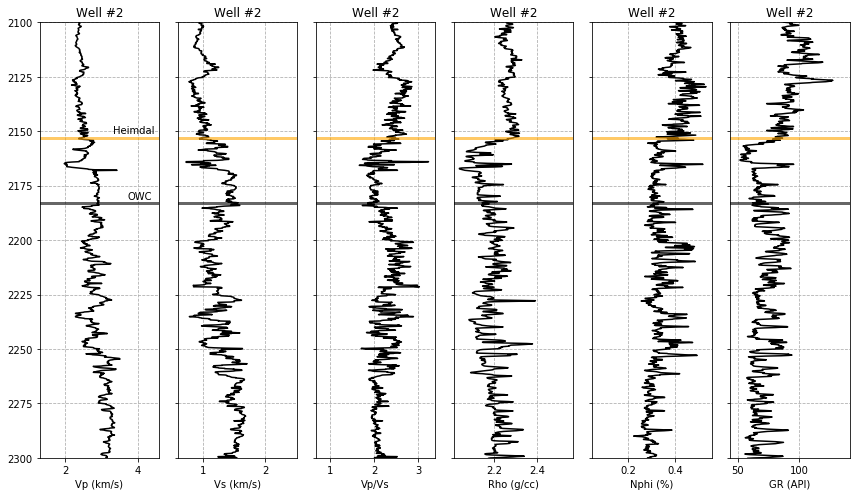

In [3]:
log = [w2vp, w2vs, w2vpvs, w2rho, w2phi, w2gr]
unit = ['Vp (km/s)', 'Vs (km/s)', 'Vp/Vs', 'Rho (g/cc)', 'Nphi (%)', 'GR (API)']

f, ax = plt.subplots(nrows=1,ncols=6,figsize=(12,7))
for i in range(len(log)):
    ax[i].plot(log[i],w2z,'-k')
    ax[i].set_title('Well #2')
    ax[i].axhline(y=float(tops_w2['Heimdal']),color='orange',lw=3,alpha=0.6)
    ax[i].axhline(y=float(tops_w2['OWC']),color='black',lw=3,alpha=0.6)
    ax[i].set_xlabel(unit[i])
    ax[i].set_ylim(2300,2100)
    if i == 0:
        ax[i].text(3.3,tops_w2['Heimdal']-2,'Heimdal')
        ax[i].text(3.7,tops_w2['OWC']-2,'OWC')
    else:
        ax[i].set_yticklabels([])
    ax[i].grid(linestyle='--')
        
plt.tight_layout()

In [35]:
angle = 30

#poisson ratio
pr=0.5*((w2vpvs**2-2)/(w2vpvs**2-1))

ai=ip.ai(w2vp,w2rho) # acoustic impedance
ei=ip.ei(w2vp,w2vs,w2rho,angle) # elastic impedance
lambda_rho,mu_rho=ip.lrm(w2vp,w2vs,w2rho) # lambda rho and mu rho

#get the closest location of the top on the depth array
index = (np.abs(w2z - tops_w2['Heimdal'])).argmin()
#w2z[index]

nei=ip.nei(w2vp,w2vs,w2rho,w2vp[index],w2vs[index],w2rho[index],angle) # normalized elastic impedance

IndexError: list index out of range

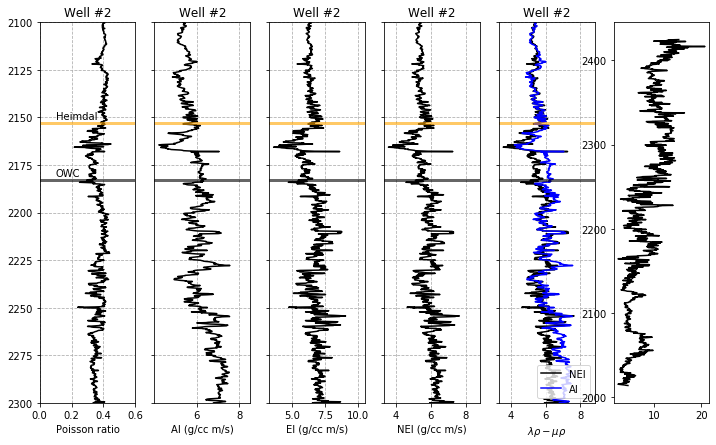

In [56]:
log = [pr, ai, ei,nei, lambda_rho, mu_rho]
unit = ['Poisson ratio', 'AI (g/cc m/s)', 'EI (g/cc m/s)', 'NEI (g/cc m/s)', r'$\lambda\rho - \mu\rho$']

f, ax = plt.subplots(nrows=1,ncols=6,figsize=(12,7))
for i in range(len(log)):
    if i == 4:
        ax[i].plot(log[3],w2z,'-k',label='NEI')
        ax[i].plot(log[1],w2z,'-b',label='AI')
        ax[i].legend(loc='lower right')        
    elif i == 5:
        ax[i].plot(log[i],w2z,'-k',label=r'$\lambda\rho$')
        ax[i].plot(log[i+1],w2z,'-b',label=r'$\mu\rho$')
        ax[i].legend(loc='lower right')
    else:
        ax[i].plot(log[i],w2z,'-k')
    if i == 0:
        ax[i].text(0.1,tops_w2['Heimdal']-2,'Heimdal')
        ax[i].text(0.1,tops_w2['OWC']-2,'OWC')
        ax[i].set_xlim(0,0.6)
    else:
        ax[i].set_yticklabels([])
    ax[i].axhline(y=float(tops_w2['Heimdal']),color='orange',lw=3,alpha=0.6)
    ax[i].axhline(y=float(tops_w2['OWC']),color='black',lw=3,alpha=0.6)        
    ax[i].set_title('Well #2')
    ax[i].grid(linestyle='--')
    ax[i].set_ylim(2300,2100)   
    ax[i].set_xlabel(unit[i])
        
plt.tight_layout()

In [51]:
len(log)

6

In [65]:
(np.abs(w2z - tops_w2['Heimdal']))

array([139.7472, 139.5948, 139.4424, ..., 487.2263, 487.3789, 487.5312])

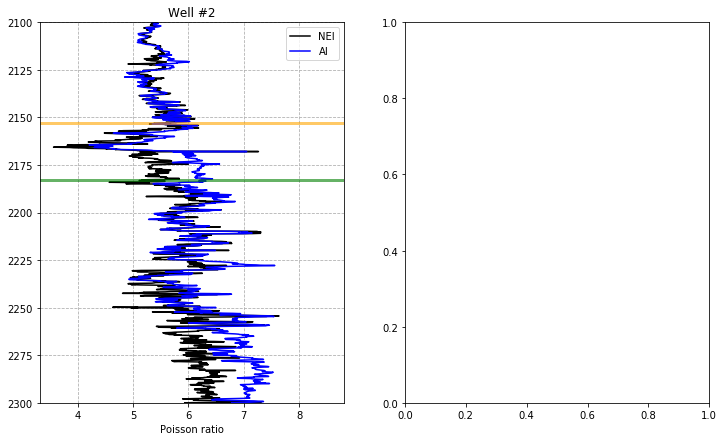

In [64]:
f, ax = plt.subplots(nrows=1,ncols=2,figsize=(12,7))

ax[0].plot(log[3],w2z,'-k',label='NEI')
ax[0].plot(log[1],w2z,'-b',label='AI')
ax[0].axhline(y=float(tops_w2['Heimdal']),color='orange',lw=3,alpha=0.6)
ax[0].axhline(y=float(tops_w2['OWC']),color='green',lw=3,alpha=0.6)        
ax[0].set_title('Well #2')
ax[0].grid(linestyle='--')
ax[0].set_ylim(2300,2100)   
ax[0].set_xlabel(unit[0]) 
ax[0].legend()

In [34]:
w2vp[index]

2.4397000000000006

## References

Alessandro del Monte - Top Heimdal map https://github.com/aadm/geophysical_notes/blob/master/top_heimdal_map.ipynb

Avseth, P., Mukerji, T., & Mavko, G., 2010. Quantitative seismic interpretation: Applying rock physics tools to reduce interpretation risk. Cambridge university press.

The dataset: https://srb.stanford.edu/quantitative-seismic-interpretation